In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surendra253
Your Kaggle Key: ··········


100%|██████████| 163M/163M [00:09<00:00, 18.7MB/s]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask=os.listdir('/content/face-mask-dataset/data/with_mask')
print('number of images with mask: ',len(with_mask))
print(with_mask[:5])

number of images with mask:  3725
['with_mask_2636.jpg', 'with_mask_2849.jpg', 'with_mask_2936.jpg', 'with_mask_2847.jpg', 'with_mask_69.jpg']


In [ ]:
without_mask=os.listdir('/content/face-mask-dataset/data/without_mask')
print('number of images without mask: ',len(without_mask))

number of images without mask:  3828


In [ ]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828
labels=with_mask_labels+without_mask_labels
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

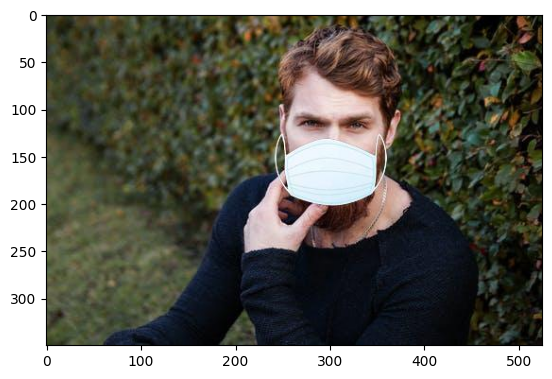

In [ ]:
#display images
img=mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

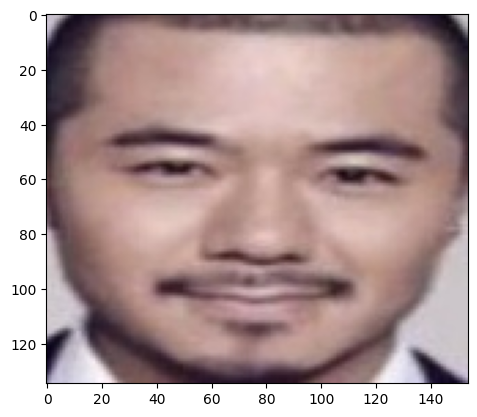

In [ ]:
img=mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_10.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
data=[]
for img in with_mask:
  image=Image.open('/content/face-mask-dataset/data/with_mask/'+img)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
for img in without_mask:
  image=Image.open('/content/face-mask-dataset/data/without_mask/'+img)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data[0][0]),len(data[0]))
data[0][0]

128 128


array([[232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [232, 233, 238],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [234, 235, 240],
       [234, 235, 240],
       [234, 235, 240],
       [234, 235, 240],
       [234, 235, 240],
       [234, 235, 240],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [233, 234, 239],
       [234, 235, 240],
       [234, 235, 240],
       [234, 235, 240],
       [232, 235, 236],
       [232, 233, 235],
       [233, 234, 236],
       [234, 234, 236],
       [228, 228, 225],
       [213, 214, 204],
       [180, 177, 163],
       [123, 105

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X=np.array(data)
Y=np.array(labels)
print(X.shape,'\n',Y.shape)


(7553, 128, 128, 3) 
 (7553,)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
xtrain_scaled=xtrain/255
xtest_scaled=xtest/255
print(xtrain[0])
print(xtrain_scaled[0])

[[[104  95  90]
  [104  95  89]
  [102  93  88]
  ...
  [ 39  35  32]
  [ 41  37  34]
  [ 42  38  35]]

 [[ 92  83  78]
  [ 92  83  79]
  [ 93  84  80]
  ...
  [ 40  36  33]
  [ 42  38  35]
  [ 43  39  36]]

 [[ 84  76  71]
  [ 84  76  72]
  [ 85  75  73]
  ...
  [ 45  41  38]
  [ 47  43  40]
  [ 48  44  41]]

 ...

 [[224 233 230]
  [222 231 229]
  [219 228 227]
  ...
  [126 120 114]
  [117 112 106]
  [112 108 102]]

 [[226 235 232]
  [216 225 223]
  [197 206 205]
  ...
  [106 102  97]
  [ 99  96  91]
  [ 95  94  90]]

 [[220 229 226]
  [202 211 208]
  [170 179 177]
  ...
  [103 100  95]
  [ 90  88  84]
  [ 84  83  79]]]
[[[0.40784314 0.37254902 0.35294118]
  [0.40784314 0.37254902 0.34901961]
  [0.4        0.36470588 0.34509804]
  ...
  [0.15294118 0.1372549  0.1254902 ]
  [0.16078431 0.14509804 0.13333333]
  [0.16470588 0.14901961 0.1372549 ]]

 [[0.36078431 0.3254902  0.30588235]
  [0.36078431 0.3254902  0.30980392]
  [0.36470588 0.32941176 0.31372549]
  ...
  [0.15686275 0.1411764

In [ ]:
import tensorflow
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain_scaled,ytrain,validation_split=0.2,epochs=20)


Epoch 1/20
152/152 [==============================] - 6s 25ms/step - loss: 0.4717 - accuracy: 0.8125 - val_loss: 0.2739 - val_accuracy: 0.8966
Epoch 2/20
152/152 [==============================] - 3s 23ms/step - loss: 0.2864 - accuracy: 0.8928 - val_loss: 0.2388 - val_accuracy: 0.9140
Epoch 3/20
152/152 [==============================] - 3s 19ms/step - loss: 0.2288 - accuracy: 0.9100 - val_loss: 0.2073 - val_accuracy: 0.9239
Epoch 4/20
152/152 [==============================] - 3s 19ms/step - loss: 0.1869 - accuracy: 0.9338 - val_loss: 0.2334 - val_accuracy: 0.9065
Epoch 5/20
152/152 [==============================] - 3s 19ms/step - loss: 0.1678 - accuracy: 0.9325 - val_loss: 0.2237 - val_accuracy: 0.9198
Epoch 6/20
152/152 [==============================] - 3s 19ms/step - loss: 0.1320 - accuracy: 0.9489 - val_loss: 0.1998 - val_accuracy: 0.9355
Epoch 7/20
152/152 [==============================] - 3s 21ms/step - loss: 0.1105 - accuracy: 0.9592 - val_loss: 0.2805 - val_accuracy: 0.9239

In [ ]:
loss,accuracy=model.evaluate(xtest_scaled,ytest)
print(loss,accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3767 - accuracy: 0.9332
0.3767488896846771 0.9331568479537964


In [ ]:
input_image_path='/content/test4.jpg'
input_image=cv2.imread(input_image_path)
# cv2.imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
ip=model.predict(input_image_reshaped)
ipl=np.argmax(ip)
print(ip)
if ipl==1:
  print('person is wearing mask')
else:
  print('perons is not wearing mask')

1/1 [==============================] - 0s 21ms/step
[[0.7050697  0.24105744]]
perons is not wearing mask


In [ ]:
model.save('my_model')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pickle

# Define the path where you want to save the model in Google Drive
save_path = '/content/drive/My Drive/models/'

# Save the entire model object
with open(f"{save_path}mymodel.pkl", 'wb') as f:
    pickle.dump(model, f)
